# Практическая работа №3

In [ ]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
import torchvision.transforms as T  # пакет transforms будет доступен под именем T
from torchvision.models import alexnet  # импортируем модель AlexNet
from torchvision.models import googlenet  # импортируем модель GoogLeNet
from torchvision.models import resnet18  # импортируем модель ResNet18
from torchvision.models import vgg16  # импортируем модель VGG16

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device, torch.cuda.get_device_name()

('cuda', 'Tesla K80')

# Часть 1. AlexNet

В данной лабораторной работе предлагается дообучить предобученные модели на уже известном нам наборе CIFAR10.

В этой части предлагается поработать с архитектурой AlexNet.

Необходимо:
1. Подготовить изображения (см. ниже);
2. "Заморозить" веса предобученной модели;
3. Заменить последний слой для соответствия размерности выхода 10-яти классам;
4. Дообучить модель.

In [ ]:
model = alexnet(pretrained=True)  # загружаем модель с предобученными весами
# Здесь необходимо выполнить 2-ой и 3-ий пункты.
# ВАШ КОД ЗДЕСЬ
for param in model.parameters():
  param.requires_grad = False # отключаем обучение

print(model.classifier)
model.classifier[6] = nn.Linear(4096, 10) # заменяем последний слой
print(model.classifier[6])
# ===============

Последовательность преобразований исходных изображений. Нужно заполнить.

Смысл этих преобразований в том, чтобы привести входные изображения из набора CIFAR10 к тому виду, который был у изображений из набора, на котором была предобучена сеть. А именно:
1. Картинки 3-ех канальные с размером `224 х 224` пикселей.
2. Картики должны быть преобразованы в тензор и иметь цветовые компоненты на отрезке `[0; 1]`.
3. Среднее по цветовым каналам должно быть `[0.485, 0.456, 0.406]`, а среднеквадратическое отклонение `[0.229, 0.224, 0.225]`.
Посмотрите документацию по классам `Compose`, `Resize`, `CenterCrop`, `ToTensor`, `Normalize` из пакета `torchvision.transforms`.

In [ ]:
transforms = T.Compose(
  # ВАШ КОД ЗДЕСЬ
  [T.Resize(256),
  T.CenterCrop(224),
  T.ToTensor(),
  T.Normalize(
    (0.485, 0.456, 0.406), 
    (0.229, 0.224, 0.225))]
  # ===============
)

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
BATCH_SIZE = 256

In [ ]:
# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/CIFAR10/train', train=True, download=True, transform=transforms)
test_data = datasets.CIFAR10(root='./data/CIFAR10/test', train=False, download=True, transform=transforms)

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/train/cifar-10-python.tar.gz to ./data/train


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/test/cifar-10-python.tar.gz to ./data/test


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.6780829429626465
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.0373178720474243
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.8755812644958496
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 0.7278246283531189
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 0.678329348564148
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 1.2618836164474487
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.5739421248435974
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 1.10695481300354
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.372712105512619
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.8275230526924133


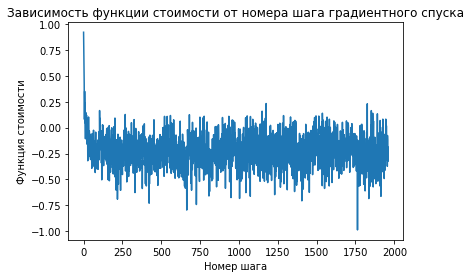

In [ ]:
# Готовимся к обучению
model = model.to(device)  # переносим модель на доступное устройство
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

# Начинаем обучение
for epoch in range(EPOCHS):
  for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
    # Нужно реализовать один шаг градиентного спуска
    loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
    # ВАШ КОД ЗДЕСЬ
    batch, labels = batch.to(device), labels.to(device)
    optimizer.zero_grad()
    prediction = model(batch)
    loss = loss_function(prediction, labels)
    loss.backward()
    optimizer.step()
    # ===============
    loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
  print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
  # Оцениваем качество модели
  train_data_loader = DataLoader(train_data, batch_size=1024)
  train_features, train_targets = next(iter(train_data_loader))

  train_features = train_features.to(device)
  train_model_predictions = torch.argmax(model(train_features), dim=1)
  print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_targets, train_model_predictions.cpu()))

  test_data_loader = DataLoader(test_data, batch_size=1024)
  test_features, test_targets = next(iter(test_data_loader))

  test_features = test_features.to(device)
  test_model_predictions = torch.argmax(model(test_features), dim=1)
  print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_targets, test_model_predictions.cpu()))


Точность (accuracy) на обучающей выборке: 0.794921875
Точность (accuracy) на тестовой выборке: 0.7529296875


# Часть 2. GoogLeNet

В этой части предлагается поработать с архитектурой GoogLeNet.

Необходимо:
1. Подготовить изображения (см. ниже);
2. "Заморозить" веса предобученной модели;
3. Заменить последний слой для соответствия размерности выхода 10-яти классам;
4. Дообучить модель.

In [ ]:
model = googlenet(pretrained=True)  # загружаем модель с предобученными весами
# Здесь необходимо выполнить 2-ой и 3-ий пункты.
# ВАШ КОД ЗДЕСЬ
for param in model.parameters():
  param.requires_grad = False
# print(model)
model.fc = nn.Linear(1024, 10)
# ===============

Последовательность преобразований исходных изображений. Нужно заполнить.

Смысл этих преобразований в том, чтобы привести входные изображения из набора CIFAR10 к тому виду, который был у изображений из набора, на котором была предобучена сеть. А именно:
1. Картинки 3-ех канальные с размером `224 х 224` пикселей.
2. Картики должны быть преобразованы в тензор и иметь цветовые компоненты на отрезке `[0; 1]`.
3. Среднее по цветовым каналам должно быть `[0.485, 0.456, 0.406]`, а среднеквадратическое отклонение `[0.229, 0.224, 0.225]`.
Посмотрите документацию по классам `Compose`, `Resize`, `CenterCrop`, `ToTensor`, `Normalize` из пакета `torchvision.transforms`.

In [ ]:
transforms = T.Compose(
  # ВАШ КОД ЗДЕСЬ
  [T.Resize(256),
  T.CenterCrop(224),
  T.ToTensor(),
  T.Normalize(
    (0.485, 0.456, 0.406), 
    (0.229, 0.224, 0.225))]
  # ===============
)

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 2
BATCH_SIZE = 256

In [ ]:
# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/CIFAR10/train', train=True, download=True, transform=transforms)
test_data = datasets.CIFAR10(root='./data/CIFAR10/test', train=False, download=True, transform=transforms)

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/train/cifar-10-python.tar.gz to ./data/train


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/test/cifar-10-python.tar.gz to ./data/test


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.7026768922805786
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.6479972004890442


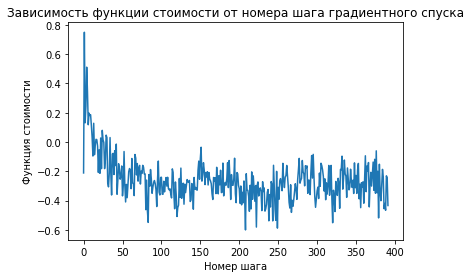

In [ ]:
# Готовимся к обучению
model = model.to(device)  # переносим модель на доступное устройство
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

# Начинаем обучение
for epoch in range(EPOCHS):
  for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
    # Нужно реализовать один шаг градиентного спуска
    loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
    # ВАШ КОД ЗДЕСЬ
    batch, labels = batch.to(device), labels.to(device)
    optimizer.zero_grad()
    prediction = model(batch)
    loss = loss_function(prediction, labels)
    loss.backward()
    optimizer.step()
    # ===============
    loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
  print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')


# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
  # Оцениваем качество модели
  train_data_loader = DataLoader(train_data, batch_size=256)
  train_features, train_targets = next(iter(train_data_loader))

  train_features = train_features.to(device)
  train_model_predictions = torch.argmax(model(train_features), dim=1)
  print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_targets, train_model_predictions.cpu()))

  test_data_loader = DataLoader(test_data, batch_size=256)
  test_features, test_targets = next(iter(test_data_loader))

  test_features = test_features.to(device)
  test_model_predictions = torch.argmax(model(test_features), dim=1)
  print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_targets, test_model_predictions.cpu()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Точность (accuracy) на обучающей выборке: 0.78515625


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Точность (accuracy) на тестовой выборке: 0.73046875


# Часть 3. ResNet

В этой части предлагается поработать с архитектурой ResNet18.

Необходимо:
1. Подготовить изображения (см. ниже);
2. "Заморозить" веса предобученной модели;
3. Заменить последний слой для соответствия размерности выхода 10-яти классам;
4. Дообучить модель.

In [ ]:
model = resnet18(pretrained=True)  # загружаем модель с предобученными весами
# Здесь необходимо выполнить 2-ой и 3-ий пункты.
# ВАШ КОД ЗДЕСЬ
for param in model.parameters():
  param.requires_grad = False
# print(model)
model.fc = nn.Linear(512, 10)
# ===============

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Последовательность преобразований исходных изображений. Нужно заполнить.

Смысл этих преобразований в том, чтобы привести входные изображения из набора CIFAR10 к тому виду, который был у изображений из набора, на котором была предобучена сеть. А именно:
1. Картинки 3-ех канальные с размером `224 х 224` пикселей.
2. Картики должны быть преобразованы в тензор и иметь цветовые компоненты на отрезке `[0; 1]`.
3. Среднее по цветовым каналам должно быть `[0.485, 0.456, 0.406]`, а среднеквадратическое отклонение `[0.229, 0.224, 0.225]`.
Посмотрите документацию по классам `Compose`, `Resize`, `CenterCrop`, `ToTensor`, `Normalize` из пакета `torchvision.transforms`.

In [ ]:
transforms = T.Compose(
  # ВАШ КОД ЗДЕСЬ
  [T.Resize(256),
  T.CenterCrop(224),
  T.ToTensor(),
  T.Normalize(
    (0.485, 0.456, 0.406), 
    (0.229, 0.224, 0.225))]
  # ===============
)

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 2
BATCH_SIZE = 256

In [ ]:
# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/CIFAR10/train', train=True, download=True, transform=transforms)
test_data = datasets.CIFAR10(root='./data/CIFAR10/test', train=False, download=True, transform=transforms)

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.5752756595611572
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.6073054075241089


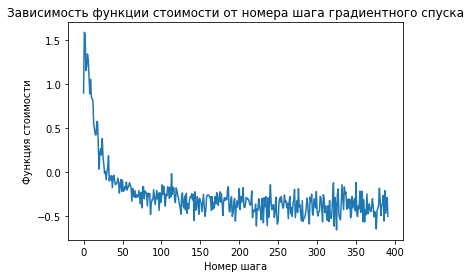

In [ ]:
# Готовимся к обучению
model = model.to(device)  # переносим модель на доступное устройство
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

# Начинаем обучение
for epoch in range(EPOCHS):
  for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
    # Нужно реализовать один шаг градиентного спуска
    loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
    # ВАШ КОД ЗДЕСЬ
    batch, labels = batch.to(device), labels.to(device)
    optimizer.zero_grad()
    prediction = model(batch)
    loss = loss_function(prediction, labels)
    loss.backward()
    optimizer.step()
    # ===============
    loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
  print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')


# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
  # Оцениваем качество модели
  train_data_loader = DataLoader(train_data, batch_size=256)
  train_features, train_targets = next(iter(train_data_loader))

  train_features = train_features.to(device)
  train_model_predictions = torch.argmax(model(train_features), dim=1)
  print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_targets, train_model_predictions.cpu()))

  test_data_loader = DataLoader(test_data, batch_size=256)
  test_features, test_targets = next(iter(test_data_loader))

  test_features = test_features.to(device)
  test_model_predictions = torch.argmax(model(test_features), dim=1)
  print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_targets, test_model_predictions.cpu()))

Точность (accuracy) на обучающей выборке: 0.78515625
Точность (accuracy) на тестовой выборке: 0.74609375


# Часть 4. VGG

В этой части предлагается поработать с архитектурой VGG16.

Необходимо:
1. Подготовить изображения (см. ниже);
2. "Заморозить" веса предобученной модели;
3. Заменить последний слой для соответствия размерности выхода 10-яти классам;
4. Дообучить модель.

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
model = vgg16(pretrained=True)  # загружаем модель с предобученными весами
# Здесь необходимо выполнить 2-ой и 3-ий пункты.
# ВАШ КОД ЗДЕСЬ
for param in model.parameters():
  param.requires_grad = False
# print(model.classifier)
model.classifier[6] = nn.Linear(4096, 10)
# ===============

Последовательность преобразований исходных изображений. Нужно заполнить.

Смысл этих преобразований в том, чтобы привести входные изображения из набора CIFAR10 к тому виду, который был у изображений из набора, на котором была предобучена сеть. А именно:
1. Картинки 3-ех канальные с размером `224 х 224` пикселей.
2. Картики должны быть преобразованы в тензор и иметь цветовые компоненты на отрезке `[0; 1]`.
3. Среднее по цветовым каналам должно быть `[0.485, 0.456, 0.406]`, а среднеквадратическое отклонение `[0.229, 0.224, 0.225]`.
Посмотрите документацию по классам `Compose`, `Resize`, `CenterCrop`, `ToTensor`, `Normalize` из пакета `torchvision.transforms`.

In [ ]:
transforms = T.Compose(
  # ВАШ КОД ЗДЕСЬ
  [T.Resize(256),
  T.CenterCrop(224),
  T.ToTensor(),
  T.Normalize(
    (0.485, 0.456, 0.406), 
    (0.229, 0.224, 0.225))]
  # ===============
)

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 1
BATCH_SIZE = 256

In [ ]:
# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/CIFAR10/train', train=True, download=True, transform=transforms)
test_data = datasets.CIFAR10(root='./data/CIFAR10/test', train=False, download=True, transform=transforms)

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 3.4890835285186768


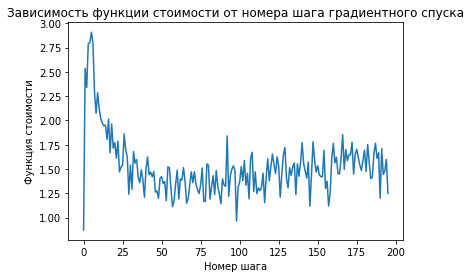

In [ ]:
# Готовимся к обучению
model = model.to(device)  # переносим модель на доступное устройство
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

# Начинаем обучение
for epoch in range(EPOCHS):
  for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
    # Нужно реализовать один шаг градиентного спуска
    loss = torch.tensor(0, dtype=torch.float16)  # значение функции стоимости на пакете, нужно рассчитать
    # ВАШ КОД ЗДЕСЬ
    batch, labels = batch.to(device), labels.to(device)
    optimizer.zero_grad()
    prediction = model(batch)
    loss = loss_function(prediction, labels)
    loss.backward()
    optimizer.step()
    # ===============
    loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
  print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')


# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
  # Оцениваем качество модели
  train_data_loader = DataLoader(train_data, batch_size=256)
  train_features, train_targets = next(iter(train_data_loader))

  train_features = train_features.to(device)
  train_model_predictions = torch.argmax(model(train_features), dim=1)
  print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_targets, train_model_predictions.cpu()))

  test_data_loader = DataLoader(test_data, batch_size=256)
  test_features, test_targets = next(iter(test_data_loader))

  test_features = test_features.to(device)
  test_model_predictions = torch.argmax(model(test_features), dim=1)
  print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_targets, test_model_predictions.cpu()))

Точность (accuracy) на обучающей выборке: 0.71875
Точность (accuracy) на тестовой выборке: 0.65625
